<a href="https://colab.research.google.com/github/teddy-teem/ImageProcessing/blob/master/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mirror an image

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:

def mirror(image): #numpy ndarray
  print(image.shape)
  x,y,z = image.shape
  mirrorImage = np.zeros((x,y,z), dtype="int32");
  for i in range(x):
    for j in range(y):
      mirrorImage[i,j,0]=image[i][y-j-1][0];
      mirrorImage[i,j,1]=image[i][y-j-1][1];
      mirrorImage[i,j,2]=image[i][y-j-1][2];
  drawMirrorImage(image, mirrorImage)
  return mirrorImage;
def drawMirrorImage(image1, image2):
  fig = plt.figure()
  plt.title("Mirror show")
  ax = fig.add_subplot(1,2,1)
  ax.imshow(image1)
  plt.axis('off')
  ax = fig.add_subplot(1,2,2)
  ax.imshow(image2)
  plt.axis('off')


(1100, 1100, 3)


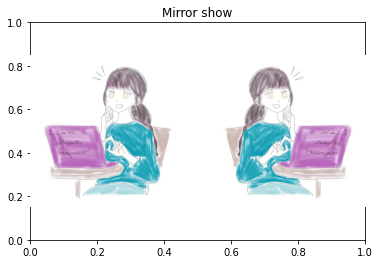

In [65]:
basicImage = np.array([[[1,200,255], [1,20,255], [1,200,25]]]);
realIamge = plt.imread("./smile.jpg");
m_im = mirror(realIamge);